In [1]:
import numpy as np
import matplotlib.pyplot as plt
from agent import KTDV
import pandas as pd
from environment import SimpleMDP
from tqdm import tqdm_notebook as tqdm
%matplotlib notebook

In [2]:
ag = KTDV(environment=SimpleMDP(nr_states=3))

all_results = {}
for ep in range(50):
    results = ag.train_one_episode()
    all_results[ep] = results



In [3]:
results = pd.DataFrame.from_dict({(trial, step): all_results[trial][step] 
                           for trial in all_results.keys() 
                           for step in all_results[trial].keys()},
                       orient='index')

In [4]:
results.index.names = ['trial', 't']

In [5]:
results.head()

weights  \
trial t                                                   
0     0                                 [0.0, 0.0, 0.0]   
      1                                 [0.0, 0.0, 0.0]   
      2                                 [0.0, 0.0, 0.0]   
      3   [0.1871819500744019, 0.4198847422510274, 0.0]   
1     0  [0.18607810331942132, 0.4195364376285726, 0.0]   

                                                       cov  \
trial t                                                      
0     0  [[0.9950002475124993, 0.0, 0.0], [0.0, 1.005, ...   
      1  [[0.9900992525365147, 0.0, 0.0], [0.0, 1.00999...   
      2  [[0.6436136601604826, 0.3226633803784545, 0.0]...   
      3  [[0.588216899403645, 0.18718195007440191, 0.0]...   
1     0  [[0.5897185890743313, 0.18607810331942135, 0.0...   

                                                        K        dt    r  \
trial t                                                                    
0     0                   [0.09950002475124992, 0.0, 0.0]  0.000000  0.0   
      1                   [0.09900992525365143, 0.0, 0.0]  0.000000  0.0   
      2   [0.3532166178198736, -0.32425245979834005, 0.0]  0.000000  0.0   
      3     [0.1871819500744019, 0.4198847422510274, 0.0]  1.000000  1.0   
1     0  [0.05897185890743312, 0.018607810331942132, 0.0] -0.018718  0.0   

         state      rhat         V  
trial t                             
0     0      0  0.000000  0.000000  
      1      0  0.000000  0.000000  
      2      0  0.000000  0.000000  
      3      1  0.000000  0.000000  
1     0      0  0.018718  0.187182

Text(0.5, 1.0, 'Predicted reward for transition 2-3 (R hat)')

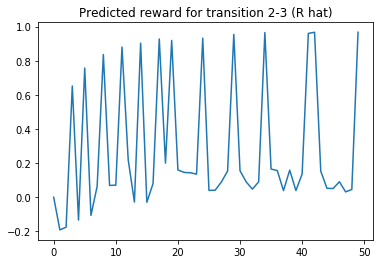

In [6]:
plt.figure()
plt.plot(np.array(results.xs(1,level='t').rhat))
plt.title('Predicted reward for transition 2-3 (R hat)')

Text(0.5, 1.0, 'Predicted value (V)')

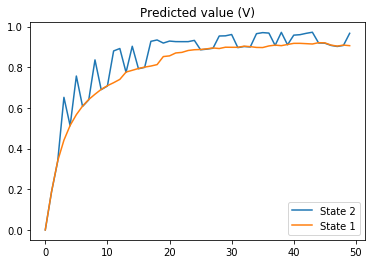

In [7]:
plt.figure()
plt.plot(np.array(results.xs(1,level='t').V))
plt.plot(np.array(results.xs(0,level='t').V))

plt.legend(['State 2', 'State 1'])

plt.title('Predicted value (V)')

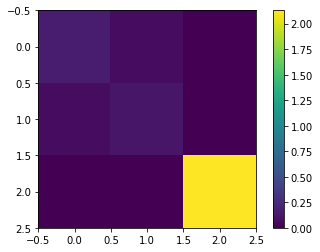

In [8]:
plt.figure()
plt.imshow(results.iloc[-1]['cov']);plt.colorbar()

In [9]:
results.iloc[-1]['weights']

array([0.90477661, 0.97092316, 0.        ])

In [10]:
results.iloc[-1].K

array([0.07171192, 0.1263309 , 0.        ])

In [11]:
all_covs = np.stack(results['cov'].values)

Text(0.5, 1.0, 'Uncertainty (variance)')

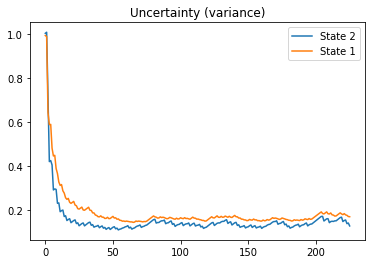

In [12]:
plt.figure()
plt.plot(all_covs[:, 1, 1])
plt.plot(all_covs[:, 0, 0])
plt.legend(['State 2', 'State 1'])

plt.title('Uncertainty (variance)')

## Now try a 2D GridWorld

In [13]:
from environment import GridWorld
from matplotlib import pyplot as plt, patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
ag2 = KTDV(environment=GridWorld('./mdps/10x10.mdp'))

In [14]:
ag2.env.reward_func

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
def plot_maze(ax):
    for idx in range(ag2.env.num_cols * ag2.env.num_rows):
        x, y = ag2.env.get_state_position(idx)
        if ag2.env.matrix_MDP[x][y] == -1:
            plt.gca().add_patch(
                patches.Rectangle(
                    (y, ag2.env.num_rows - x - 1),  # (x,y)
                    1.0,  # width
                    1.0,  # height
                    facecolor="gray"
                )
            )
        else:
            pass

    for i in range(ag2.env.num_cols):
        plt.axvline(i, color='k', linestyle=':')
    plt.axvline(ag2.env.num_rows, color='k', linestyle=':')

    for j in range(ag2.env.num_rows):
        plt.axhline(j, color='k', linestyle=':')
    plt.axhline(ag2.env.num_rows, color='k', linestyle=':')

    plt.text(ag2.env.goal_x + .1, ag2.env.goal_y + .1, 'G', fontsize=20, color='green')
    plt.text(ag2.env.start_x + .1, ag2.env.start_y + .1, 'S', fontsize=20, color='black')


    plt.xlim([0,12])
    plt.ylim([0,12])
    plt.box(False)

    aspect_ratio = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
    ax.set_aspect(aspect_ratio)
    


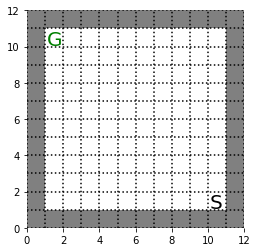

In [16]:
fig, ax = plt.subplots()
plot_maze(ax)

In [17]:
all_results = {}
for ep in tqdm(range(50)):
    results = ag2.train_one_episode(random_policy=True)
    all_results[ep] = results


In [18]:
results = pd.DataFrame.from_dict({(trial, step): all_results[trial][step] 
                           for trial in all_results.keys() 
                           for step in all_results[trial].keys()},
                       orient='index')

results.index.names = ['trial', 't']

In [19]:
results.tail()

weights  \
trial t                                                        
49    995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      996  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      997  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      998  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                         cov  \
trial t                                                        
49    995  [[133.2499999999513, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      996  [[133.2549999999513, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      997  [[133.2599999999513, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      998  [[133.2649999999513, 0.0, 0.0, 0.0, 0.0, 0.0, ...   
      999  [[133.2699999999513, 0.0, 0.0, 0.0, 0.0, 0.0, ...   

                                                           K        dt    r  \
trial t                                                                       
49    995  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.004740  0.0   
      996  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.005152  0.0   
      997  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.006566  0.0   
      998  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.006366  0.0   
      999  [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ... -0.005713  0.0   

           state      rhat         V  
trial t                               
49    995     98  0.004740  0.045299  
      996     99  0.005152  0.046254  
      997     87  0.006566  0.047213  
      998     99  0.006366  0.045536  
      999     98  0.005713  0.044372

In [20]:
first_episode = results.xs(0,level='trial')

In [21]:
locations = np.array([ag2.env.get_state_position(t) for t in first_episode.state.values])

Text(0.5, 1.0, 'Occupancy during first trial')

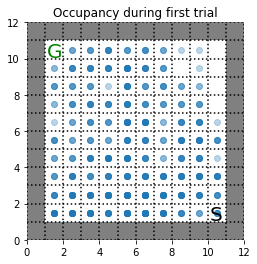

In [22]:
fig, ax = plt.subplots()

plot_maze(ax)

plt.scatter(locations[:,0]+.5, locations[:,1]+.5, alpha=.3)

plt.title('Occupancy during first trial')


Text(0.5, 1.0, 'Value function (after 50 episodes)')

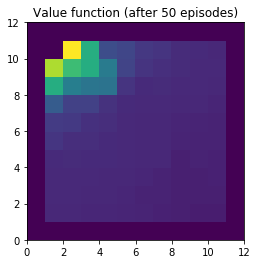

In [23]:
fig, ax = plt.subplots()
plt.pcolor(np.flip(results.iloc[-1].weights.reshape(12,12)))

aspect_ratio = np.diff(ax.get_xlim())[0] / np.diff(ax.get_ylim())[0]
ax.set_aspect(aspect_ratio)
plt.title('Value function (after 50 episodes)')

In [24]:
all_results = {}
for ep in tqdm(range(50)):
    results = ag2.train_one_episode(random_policy=False)
    all_results[ep] = results


In [25]:
results = pd.DataFrame.from_dict({(trial, step): all_results[trial][step] 
                           for trial in all_results.keys() 
                           for step in all_results[trial].keys()},
                       orient='index')

results.index.names = ['trial', 't']

In [26]:
last_episode = results.xs(0,level='trial')

In [29]:
locations = np.array([ag2.env.get_state_position(t) for t in last_episode.state.values])

In [31]:
locations.shape

(777, 2)